In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

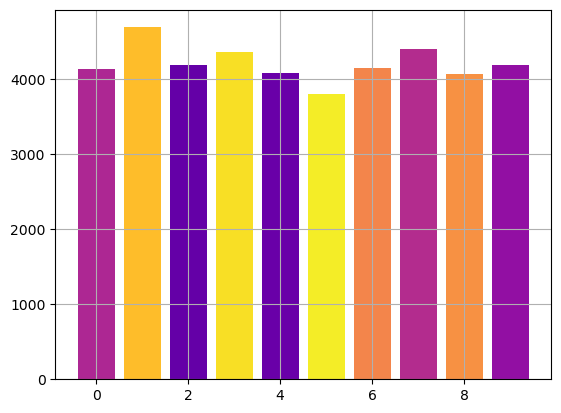

In [6]:
def count_exemple_per_digit(exemples):
    hist = np.ones(10)

    for y in exemples:
        hist[y] += 1

    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('plasma')(np.random.uniform(0.0,1.0,1)[0]))

    bar = plt.bar(np.arange(10), hist, 0.8, color=colors)

    plt.grid()
    plt.show()

count_exemple_per_digit(Y_train)

In [7]:
# Normalize the data
X_train = X_train / 255.0
# renklerin alabileceği maksimum değer 255 dir
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
Y_train=Y_train.values.reshape(-1,1)
Y_test =Y_test.values.reshape(-1,1)
print("x train shape : ",X_train.shape)
print("x test shape : ",X_test.shape)
print("y train shape : ",Y_train.shape)
print("y test shape : ",Y_test.shape)


x train shape :  (33600, 784)
x test shape :  (8400, 784)
y train shape :  (33600, 1)
y test shape :  (8400, 1)


## Support Vector 
* Support Vector Machine genellikle sınıflandırma problemlerinde kullanılan gözetimli öğrenme yöntemlerinden biridir.
* Bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer.
* Bu doğrunun, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar.
* Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.

* Daha açıklayıcı olması için görsel üzerinde tekrar inceleyelim.
<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/640/1*OGs3M3e9zPDfRaVx2BRoPg.webp" alt="gec2" border="0"></a>

* Tabloda siyahlar ve beyazlar olmak üzere iki farklı sınıf var.
* Sınıflandırma problemlerindeki asıl amacımız gelecek verinin hangi sınıfta yer alacağını karar vermektir.
* Bu sınıflandırmayı yapabilmek için iki sınıfı ayıran bir doğru çizilir ve bu doğrunun ±1'i arasında kalan yeşil bölgeye Margin adı verilir.
* Margin ne kadar geniş ise iki veya daha fazla sınıf o kadar iyi ayrıştırılır.

* Formüle bakacak olursak:

<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/640/1*vFJs39qUz-VIuanwxCqPcg.webp" alt="gec2" border="0"></a>

* Aslında değişen pek bir şey yok. w; ağırlık vektörü (θ1), x; girdi vektörü, b; sapmadır (θ0).
* Yeni bir değer için çıkan sonuç 0'dan küçükse, beyaz noktalara daha yakın olacaktır.
* Tam tersi, çıkan sonuç 0'a eşit veya büyükse, bu durumda siyah noktalara daha yakın olacaktır.

### Hard Margin vs Soft Margin
* Marginimiz her zaman bu şekilde olmayabilir.
* Bazen örneklerimiz Margin bölgesine girebilir.
* Buna Soft Margin denir.
* Hard Margin, verimiz doğrusal olarak ayrılabiliyorsa çalışır ve aykırı değerlere karşı çok duyarlıdır.
* Bu yüzden bazı durumlarda Soft Margin’i tercih etmemiz gerekebilir.

<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/640/1*yWtPGQrfiNDlcD0AJjdpiA.webp" alt="gec2" border="0"></a>


* İkisi arasındaki dengeyi SVM içerisindeki C hiperparametresi ile kontrol edebiliriz. 
* C ne kadar büyükse Margin o kadar dardır.

<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/720/1*3lpLsxrE1GLEzz-IXIUscg.webp" alt="gec2" border="0"></a>

* Ayrıca model overfit olursa C’yi azaltmamız gerekir.


### Kernel Trick
* Düşük boyutlar karmaşık veri setlerini açıklamada yeterli olmayabilir.
* Boyutu arttırsak işlemler artacağı için çok uzun sürer.
* İşte Kernel Trick burada devreye giriyor.
* Elimizdeki koordinatları belirli Kernel Fonksiyonları ile çarparak çok daha anlamlı hale getirebiliyoruz.

* Bu yöntemlerden en çok kullanılan ikisini detaylı olarak açıklayacağım.


#### 1-) Polynomial Kernel:
* Bu yöntemde problemimizi çözmek için 2 boyuttan çıkıp 3 veya daha fazlası boyutta işlem yapıyormuş gibi hareket ediyoruz.

<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/720/1*NKaQXNMyjRWHblfpAFu_QA.webp" alt="gec2" border="0"></a>

* Soldaki (2 boyut) dağılımı bir doğru ile sınıflandıramayız.
* Bunun için bu gibi problemlerde Polynomial Kernel’i kullanabiliriz.
* 3. boyutta işlem yaparken sınıflara ayırmak için doğru yerine bir düzlem kullanılırız ve çok daha düzgün bir şekilde sınıflandırabiliriz.

* Modelimiz overfit olmuşsa derecesini düşürmeniz, underfit olmuşsa derecesini yükseltmeniz gerekir.
* Ayrıca coef0 hiperparametresiyle modelinizin yüksek dereceli denklemlerden ne kadar etkileneceğini ayarlayabilirsiniz(sadece ‘poly’ ve ‘sigmoid’ kernelda etkili olur).

#### 2-) Gaussian RBF (Radial Basis Function) Kernel:
* Anlaması biraz güç olabilir ama sonsuz boyuttaki Destek Vektör Makinelerini bulur ve her bir noktanın belirli bir noktaya ne kadar benzediğini normal dağılım ile hesaplar, ona göre sınıflandırır.
* Dağılımın genişliğini gamma hiperparametresi ile kontrol ederiz.
* Gamma ne kadar küçükse dağılım o kadar geniş olur.
* C hiperparametresindeki gibi, model overfit olmuşsa gamma değerini düşürmemiz, model underfit olmuşsa gamma değerini yükseltmemiz gerekir.

<a href="https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e...."><img src="https://miro.medium.com/max/720/1*dth2KN4f4z8RMN4VDbD7cw.webp" alt="gec2" border="0"></a>

* Veri setiniz aşırı büyük değilse genellikle RBF Kernel tercih edilir.

In [9]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm = svm.fit(X_train,Y_train)
print("Score : ", svm.score(X_test,Y_test))

Score :  0.973452380952381
